# Exercise 1.1 Pandas

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import warnings
warnings.filterwarnings('ignore')

### Load data
To load the data into dataframe from the .csv file

In [2]:
data = pd.read_csv("GasPrices.csv")
data.head()

,Unnamed: 0,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,1,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,2,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other
2,3,3,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,41279,Other
3,4,4,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,41279,Chevron-Texaco
4,5,5,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,41279,Shell


###  

###  

###  

###  

###  

### Summarize numeric values
This cell summarizes the sum, mean, standard deviation of Price, pumps, gasolines and income

In [22]:
Price_mean = round(np.mean(data["Price"]),3)
Price_sum = np.sum(data["Price"])
Price_sd = np.std(data["Price"])
Price_min = np.min(data["Price"])
Price_max = np.max(data["Price"])
print("Price:\nMean:",round(Price_mean,3),"\t\tSum:",round(Price_sum,3),"\tStandard Deviation:",round(Price_sd,3),"\nMin:",round(Price_min,3),"\t\tMax:",round(Price_max,3))
Pumps_mean = np.mean(data["Pumps"])
Pumps_sum = np.sum(data["Pumps"])
Pumps_sd = np.std(data["Pumps"])
Pumps_min = np.min(data["Pumps"])
Pumps_max = np.max(data["Pumps"])
print("\nPumps:\nMean:",round(Pumps_mean,3),"\t\tSum:",round(Pumps_sum,3),"\tStandard Deviation:",round(Pumps_sd,3),"\nMin:",round(Pumps_min,3),"\t\tMax:",round(Pumps_max,3))
Income_mean = np.mean(data["Income"])
Income_sum = np.sum(data["Income"])
Income_sd = np.std(data["Income"])
Income_min = np.min(data["Income"])
Income_max = np.max(data["Income"])
print("\nIncome:\nMean:",round(Income_mean,3),"\tSum:",round(Income_sum,3),"\tStandard Deviation:",round(Income_sd,3),"\nMin:",round(Income_min,3),"\t\tMax:",round(Income_max,3))
Gasoline_mean = np.mean(data["Gasolines"])
Gasoline_sum = np.sum(data["Gasolines"])
Gasoline_sd = np.std(data["Gasolines"])
Gasoline_min = np.min(data["Gasolines"])
Gasoline_max = np.max(data["Gasolines"])
print("\nGasolines:\nMean:",round(Gasoline_mean,3),"\t\tSum:",round(Gasoline_sum,3),"\tStandard Deviation:",round(Gasoline_sd,3),"\nMin:",round(Gasoline_min,3),"\t\tMax:",round(Gasoline_max,3))

Price:
Mean: 1.864 		Sum: 188.29 	Standard Deviation: 0.081 
Min: 1.73 		Max: 2.09

Pumps:
Mean: 6.95 		Sum: 702 	Standard Deviation: 3.906 
Min: 2 		Max: 24

Income:
Mean: 56727.218 	Sum: 5729449 	Standard Deviation: 25739.98 
Min: 12786 		Max: 128556

Gasolines:
Mean: 3.465 		Sum: 350 	Standard Deviation: 0.555 
Min: 1 		Max: 4


### Group field by name
This cell sorts the data in ascending order inorder to compute the mean of price of income per brand

In [9]:
Data_sorted = data.sort_values('Name')
Data_sorted = Data_sorted.reset_index(drop = True)

In [10]:
Data_sorted.head()

,Unnamed: 0,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,101,101,7-Eleven,1.95,4,Y,N,N,N,Y,Y,Both,3,N,78703,717 North Lamar,81903,Other
1,14,14,7-Eleven,1.95,4,Y,N,N,N,Y,Y,Both,3,N,78701,1814 Guadalupe St,87306,Other
2,50,50,7-Eleven,1.79,4,Y,N,N,N,Y,Y,Both,3,Y,78741,1705 S Lakeshore Blvd,31192,Other
3,12,12,7-Eleven,1.97,4,Y,N,N,N,Y,Y,Both,3,N,78705,2600 Guadalupe St,12786,Other
4,25,25,7-Eleven,1.84,6,Y,N,N,N,Y,Y,Both,4,N,78702,863 Airport Blvd,37690,Other


### Find average price, average pumps and average income
To find the average price, average number of pumps and average income of the brands

In [11]:
meandata = pd.DataFrame(columns = ['Name','AvgPrice','AvgPumps','AvgIncome'],index=range(0,20) )
meandata.AvgPrice = meandata.AvgPrice.astype(float)
meandata.AvgPumps = meandata.AvgPumps.astype(float)
meandata.AvgIncome = meandata.AvgIncome.astype(float)
meandata = meandata.fillna(0)
oldname = None
index = 0
for i in range(0,len(Data_sorted)):
    name = Data_sorted.Name[i]
    if oldname != name:
        meandata.Name[index] = name
        meandata.AvgPrice[index] = round(np.mean(Data_sorted.loc[Data_sorted.Name == name].Price),2)
        meandata.AvgPumps[index] = round(np.mean(Data_sorted.loc[Data_sorted.Name == name].Pumps),2)
        meandata.AvgIncome[index] = round(np.mean(Data_sorted.loc[Data_sorted.Name == name].Income),2)
        oldname = name
        index+=1


In [12]:
meandata.head()

,Name,AvgPrice,AvgPumps,AvgIncome
0,7-Eleven,1.89,4.67,53432.33
1,Around the Corner Store,1.94,2.00,63750.00
2,Chevron,1.87,8.73,61754.64
3,Citgo,1.84,4.00,49387.00
4,Conoco,1.89,4.00,43545.50


### Boxplot data
To plot the boxplot for visualizing statistical information between the variables

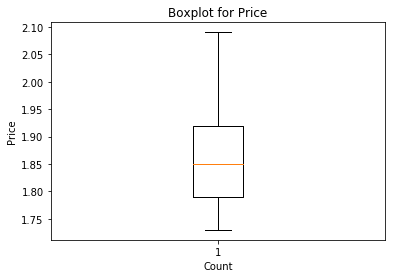

In [13]:
plt.xlabel("Count")
plt.ylabel("Price")
plt.title("Boxplot for Price")
plt.boxplot(Data_sorted.Price)
plt.show()

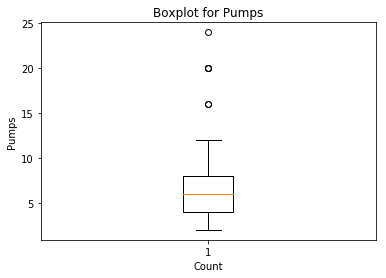

In [14]:
plt.xlabel("Count")
plt.ylabel("Pumps")
plt.title("Boxplot for Pumps")
plt.boxplot(Data_sorted.Pumps)
plt.show()

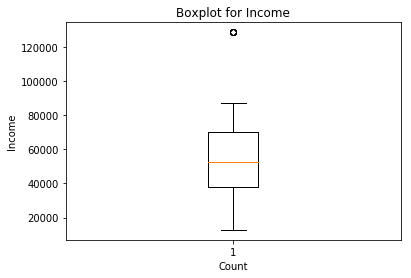

In [15]:
plt.xlabel("Count")
plt.ylabel("Income")
plt.title("Boxplot for Income")
plt.boxplot(Data_sorted.Income)
plt.show()

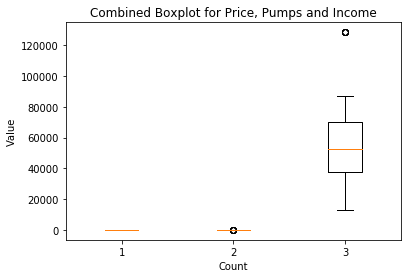

In [16]:
plt.xlabel("Count")
plt.ylabel("Value")
plt.title("Combined Boxplot for Price, Pumps and Income")
boxdata = [Data_sorted.Price,Data_sorted.Pumps,Data_sorted.Income]
plt.boxplot(boxdata)
plt.show()

### Predicting line
Predicting the target value from the set of parameters learned using least squares method

In [17]:
A = np.vstack([Data_sorted.Price, np.ones(len(Data_sorted.Price))]).T
y = np.ones((len(Data_sorted),1))
y[:,0] = Data_sorted.Income
b1,b0 = np.linalg.lstsq(A,y)[0]
print("Parameters:\n\nβ0:",round(b0[0],3),"\tβ1:",round(b1[0],3),"\n")

Parameters:

β0: -177642.807 	β1: 125717.63 



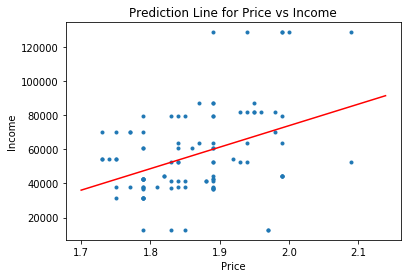

In [18]:
plt.plot(A[:,0],y,".")
t = np.arange(1.70,2.15,0.02)
plt.plot(t,b0+b1*t,'r')
plt.xlabel("Price")
plt.ylabel("Income")
plt.title("Prediction Line for Price vs Income")
plt.show()

### Normalize
Inorder to overcome noises, we normalize the income and predict the target values again

In [19]:
total = 0
for i in range (0,len(y)):
    total+= pow(y[i],2)
norm_val = pow(total,0.5)
y = y/norm_val
b1,b0 = np.linalg.lstsq(A,y)[0]
print("\n\nParameters:\n\nβ0:",round(b0[0],3),"\tβ1:",round(b1[0],3),"\n")



Parameters:

β0: -0.284 	β1: 0.201 



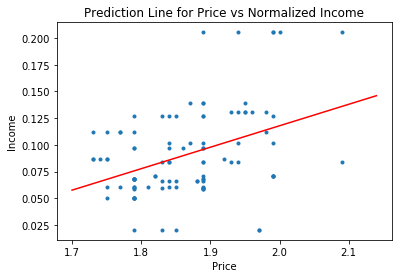

In [20]:
plt.plot(A[:,0],y,".")
t = np.arange(1.70,2.15,0.02)
plt.plot(t,b0+b1*t,'r')
plt.xlabel("Price")
plt.ylabel("Income")
plt.title("Prediction Line for Price vs Normalized Income")
plt.show()